# QHack Visualization Challenge

In this code we present a way to visualize the quantum states given a quantum circuit using tubes. This is for the hackathon of QHack 2023.  
I hope that you enjoy the work!

This is the way that we that our states are presented:

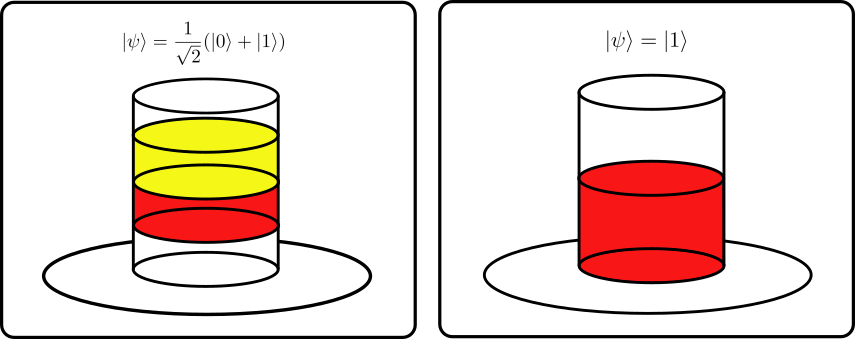

In [1]:
from IPython.display import Image
Image(filename="Images/ent_one.png")

So lets explain a bit more about it:
* The entire tube has a volume of 2. Every quantum state for one qubit have to be filled the tube equal to 1.
* The yellow part represent the probability that the 0 state happends. In our example from the left part, the probability that state 0 happends is equal to 50%.
* The same part happends to the red part, that represent the 1 state.
* The circle at the botton part represent the phase of the relative phase of the circuit. The values from the circle vary from one color from another color depending of the value of the phase. The following image show a image thats refers to this. 

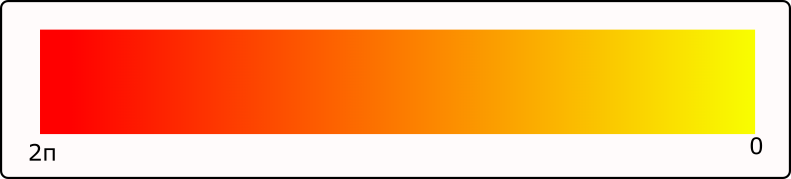

In [2]:
Image(filename="Images/phase.png")

As you can see the color of the circle depends only of the phase value.  
Now there is only one think to do to represent a quantum circuit. There is the entanglement states. With this representation using tube the entanglement state can be represent in this way:


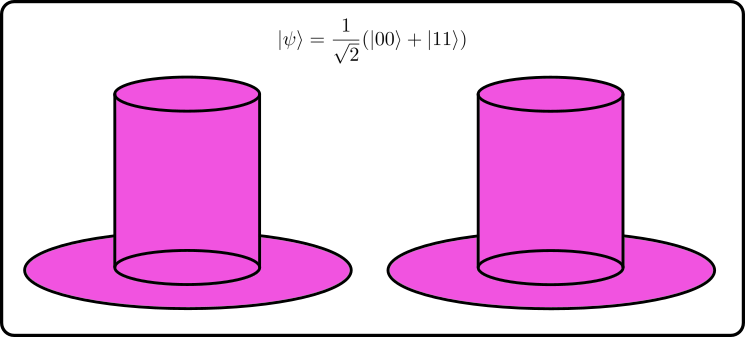

In [3]:
Image(filename="Images/ent.png")

Now, we will to contruct all the functions to generate this plot. We used **matplotlib** to create all the draws and we used **Qiskit** to create the circuit and test each of them into the plot and use some calculations. But, the code is general and you can write to just use **matplotlib** into your code.

In [4]:
# Import all the libraries.
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle
from qiskit import QuantumCircuit
import numpy as np
import qiskit.quantum_info as qi
from qiskit.quantum_info import DensityMatrix, concurrence

plt.rcParams["figure.figsize"] = [8, 28]

## First we are gona built all the required function and explain each of them.

In [5]:
# This function creates a cylinder in our plot.

def cylinder(center_x,center_y,radius,height_z, th):
    """A function that plot a cylinder in the plot.

    Args:
        center_x (float): center in x direction.
        center_y (float): center in y direction.
        radious (float): radious for the cylinder.
        height_z (float): height for the z direction.
        h (float): threshold for the cylinder in the z direction.

    Returns:
        x_grid : x grid for the plot (matplotlib).
        y_grid : y grid for the plot (matplotlib).
        z_grid : z grid for the plot (matplotlib).
    """
    
    z = np.linspace(th, height_z, 200)
    theta = np.linspace(0, 2*np.pi, 200)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

### The general Qubit representation.

$$ |\psi \rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle $$

Let try to represent this in the density matrix:

$$ \hat{\rho} = |\psi\rangle \langle \psi | = \begin{bmatrix}
            cos(\frac{\theta}{2})^2 & cos(\frac{\theta}{2})sin(\frac{\theta}{2})e^{-i\phi} \\
            cos(\frac{\theta}{2})sin(\frac{\theta}{2})e^{i\phi} & sin(\frac{\theta}{2})^2
    \end{bmatrix} $$

In the following function the main idea is to find the values for 0 and 1 and the phase of the state.

In [6]:
def calculation(matrix):
    """A function that takes a 2x2 matrix and give the
    zero, one probabilities and phi angle give for the
    equation [1]

    Args:
        matrix (np.array) : matrix of the system
    
    Returns:
        zero (float) : zero probability
        one (float) : one probability
        phi (float) : relative phase.
    """

    zero = matrix[0][0]             # Probability to find the 0 state.
    one = matrix[1][1]              # Probability to find the 1 state.

    if (zero == 0 or one == 0):
        phi = 2*np.pi
    else:
        theta = np.arctan(np.sqrt(zero/one))    # Find the theta value
        # Find the phi value.
        phi = np.real(np.log(matrix[0][1]/(np.sin(theta)*np.cos(theta)))/1j)

        # Normalize to have values from 0 to 2pi.
        if phi < 0:
            phi = np.abs(phi)
        else:
            phi = 2*np.pi-phi

    return zero, one, phi

As an example of the previuos code we have:

In [7]:
# Example usign the previous function.
theta = np.pi/2
phi = np.pi

zero = np.cos(theta/2)
one = np.exp(1j*phi)*np.sin(theta/2)

rho_H_matrix = np.array([[zero*zero, zero*np.conj(one)],[ one*zero, one*np.conj(one)]])

calculation(rho_H_matrix)

((0.5000000000000001+0j), (0.5000000000000001+0j), 3.141592653589793)

In [8]:
def qubit(ax, number, zero_amp, one_amp, phase, ent):
    """A function that creates the state of the qubit on the plot.

    Args:
        ax (matplolib.ax) : axis for the plot
        number (int) : number of the qubit.
        zero_amp (float) : zero probability.
        one_amp (float) : one probability.
        phase (float) : phase of the qubit.
        ent (int) : define is the qubit is entanglement with somethig more.

    Returns:
        Just plot the qubit on the ax.
    """

    # Know if the qbuit is entangled.
    if ent == 0:

        # Create the first cylinder. 
        x, y, z = cylinder(5*number, 0, 1, 2, 0)

        # Create the cylinders for the amplitude of each state.
        # Depending of the qubit position we locate 5 times to the right.
        x_z, y_z, z_z = cylinder(5*number, 0, 1, 1+zero_amp, 1)
        x_o, y_o, z_o = cylinder(5*number, 0, 1, 1-one_amp, 1)

        # normalize the phase between 0 to 1.
        ph = np.abs(phase/(2*np.pi))

        # Create the circle with the color of the phase.
        p = Circle((5*number, 0), 2, alpha=0.5, color = (1, ph, 0))

        # This two circles are for close our states.
        p_z = Circle((5*number, 0), 1, alpha=1, color = ('y'))
        p_o = Circle((5*number, 0), 1, alpha=1, color = 'r')

        # Plot all the cylinders.
        ax.plot_surface(x, y, z, alpha=0.05, color = 'b')
        ax.plot_surface(x_z, y_z, z_z, alpha=1, color='y') 
        ax.plot_surface(x_o, y_o, z_o, alpha=1, color='r') 

        # Add/Plot all the circles.
        ax.add_patch(p)
        ax.add_patch(p_z)
        ax.add_patch(p_o)
        
        # Change to 3D representation the circles.
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")
        art3d.pathpatch_2d_to_3d(p_z, z=1+zero_amp, zdir="z")
        art3d.pathpatch_2d_to_3d(p_o, z=1-one_amp, zdir="z")
    
    # The qubit is entangled.
    else:

        # Created the cylinder.
        x, y, z = cylinder(5*number, 0, 1, 2, 0)

        # Add the cylinder with just one color.
        ax.plot_surface(x, y, z, alpha=1, color = 'm')

        # Created the circle with just one color.
        p = Circle((5*number, 0), 2, alpha=0.5, color = 'm')

        # Add the circle.
        ax.add_patch(p)

        # Change to 3D representation the circle.
        art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

In [9]:
def is_entanglement(qubit, qubits, matrix):
    """A function that check if a qubit is entangled with other one.

    Args:
        qubit (int) : the qubit to check.
        qubits (int) : the number of qubits.
        matrix (np.array) : the matrix of the system.

    Returns:
        ent (bool) : if the qubit is entangled.

    """
    ent = False

    # This list is to trace all the qubits and find the concurrence.
    qubit_list = []

    # Add all the qubits.
    for i in range(qubits):
        qubit_list.append(i)

    # Remove the qubit that we are located.
    qubit_list.remove(qubit)

    # Loop over all the possible pairs.
    for i in qubit_list:
        new_list = qubit_list.copy()
        # Remove the qubit in which we are working.
        new_list.remove(i)

        # Trce the system that we arent interested.
        trace_matrix = qi.partial_trace(matrix, new_list)

        # Qiskit function to calculate the concurrence.
        concu = concurrence(trace_matrix)

        # The qubit is entangled with other?
        if concu > 0.99:
            ent = True

    return ent

In [10]:
def plot_circuit_tubes(qubits, density_matrix):
    """A function that plot the circuit with tubes.

    Args:
        qubits (int) : the number of qubits.
        density_matrix (np.array) : the density matrix of the system.

    Returns:
        The plot using matplotlib.
    """

    # Create the plot with 3D representation.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Go over all the qubits.
    for i in range(qubits):

        qubit_list = []

        # Add all the qubit except the qubit in which we are located.
        for j in range(qubits):
            if j!=i:
                qubit_list.append(j)

        # The qubit is entangled?
        # Call the function is_entanglement()
        if is_entanglement(i,qubits,density_matrix) == True:

            # Plot the qubit with entanglemend.
            # Call the function qubit()
            qubit(ax, i, 0, 0, 0, 1)

        # The qubit is not entangled?
        else:

            # Calculate the partial trace of the circuit.
            qubit_matrix = np.array(qi.partial_trace(density_matrix, qubit_list))
            m = np.array(qubit_matrix)
            # Call the function calculation()
            zero, one, phi = calculation(m)
            # Plot the qubit.
            qubit(ax, i, zero, one, phi, 0)

    # Some visulizations.
    ax.set_ylim(-4,4)
    ax.set_xlim(-1, qubits*4)
    ax.set_zlim(0,2)

    ax.grid(False)
    ax.axis('off')

    # Change the view.
    ax.view_init(15, 85)

    # return the plot.
    return plt.show()

Perfect! We have all the requirements to start plotting our tubes.  
Lets do this with a couple of quantum circuits...

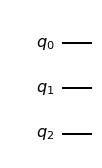

In [11]:
# Just an easy state.
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.draw('mpl')

c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1813: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1814: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


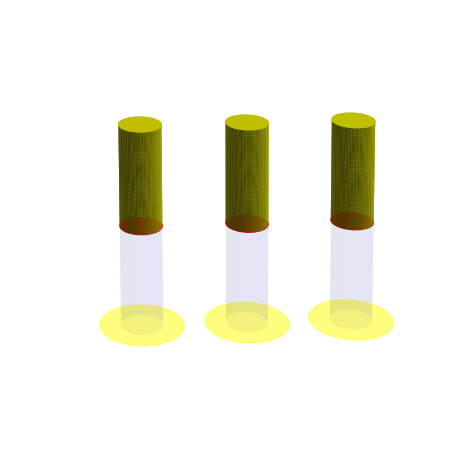

In [12]:
# This function create the density matrix to our function.
rho = qi.DensityMatrix.from_instruction(qc)
rho = np.array(rho)

plot_circuit_tubes(num_qubits, rho)

As you can see the circuit is just a initializate circuit. Because this have all the qubits with value 0 and phase equal to 0 too.  
Lets try another more complicate circuit.

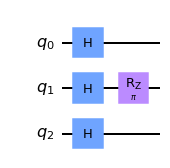

In [13]:
# All using the Hadamard.
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.h(1)
qc.rz(np.pi, 1)
qc.h(2)
qc.draw('mpl')

In this circuit we have all the qubits with equal probability and in the second qubit we have a phase rotation by pi. Lets see how our draw is.

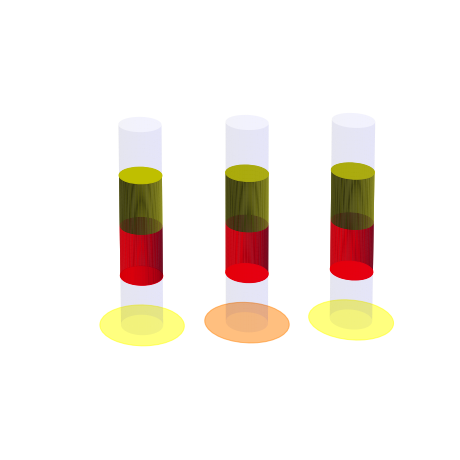

In [14]:
rho = qi.DensityMatrix.from_instruction(qc)
rho = np.array(rho)

plot_circuit_tubes(num_qubits, rho)

Perfect! We have the correct representation usign tubes.

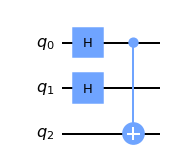

In [15]:
# Lets entangled this qubits.
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.h(1)
qc.cnot(0,2)
qc.draw('mpl')

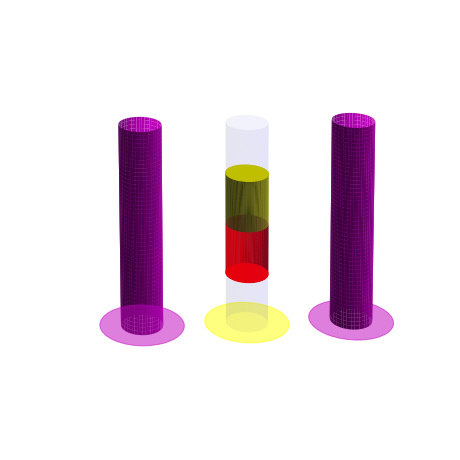

In [16]:
rho = qi.DensityMatrix.from_instruction(qc)
rho = np.array(rho)

plot_circuit_tubes(num_qubits, rho)

AS you can see the only qubits that are entangled are the 0 and 2.

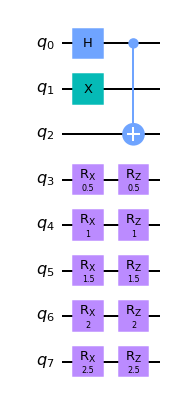

In [17]:
# Lets do it bigger.
num_qubits = 8
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.x(1)
qc.cnot(0,2)
qc.rx(0.5,3)
qc.rz(0.5,3)
qc.rx(1,4)
qc.rz(1,4)
qc.rx(1.5,5)
qc.rz(1.5,5)
qc.rx(2,6)
qc.rz(2,6)
qc.rx(2.5,7)
qc.rz(2.5,7)
qc.draw('mpl')

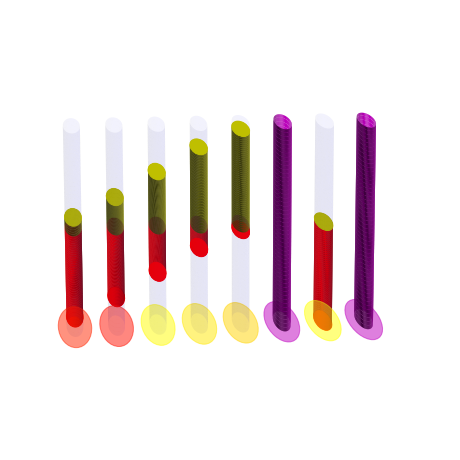

In [18]:
rho = qi.DensityMatrix.from_instruction(qc)
rho = np.array(rho)

plot_circuit_tubes(num_qubits, rho)

As you can see even with 8 qubits the circuit is working propertly with the entangled qubits and change the relative phase of each qubit with also the probabilities.

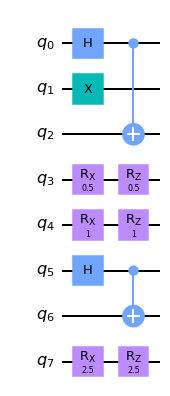

In [19]:
# The final one.
num_qubits = 8
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.x(1)
qc.cnot(0,2)
qc.rx(0.5,3)
qc.rz(0.5,3)
qc.rx(1,4)
qc.rz(1,4)
qc.h(5)
qc.cnot(5,6)
qc.rx(2.5,7)
qc.rz(2.5,7)
qc.draw('mpl')

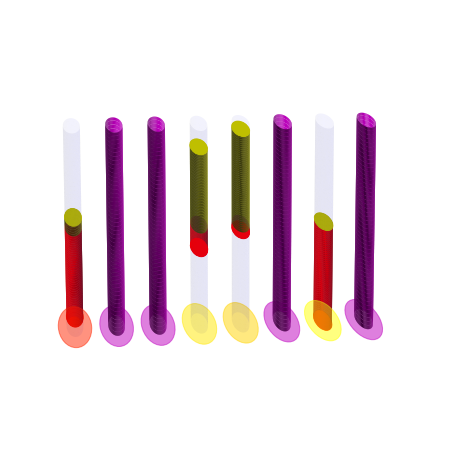

In [20]:
rho = qi.DensityMatrix.from_instruction(qc)
rho = np.array(rho)

plot_circuit_tubes(num_qubits, rho)

Doesnt matter how many entangled qubit we have!

# Final Remarks and Future Implementations:

We hope that you implement this plots into your simulations.  
There also many things to take care in very detail about how to represent propertly each qubit.   
For future representations we have the following ideas:  
Change the phase representation with a more intuited and visualize way. Such as in the following image:

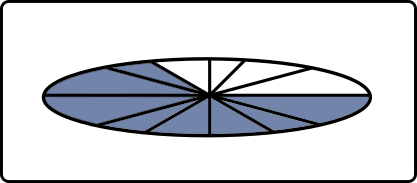

In [21]:
Image(filename="Images/f_phase.png")

Which qubits are entangled? We plan to implemend a way to know which qubits are entangled in the system. Try to located into the circuit.

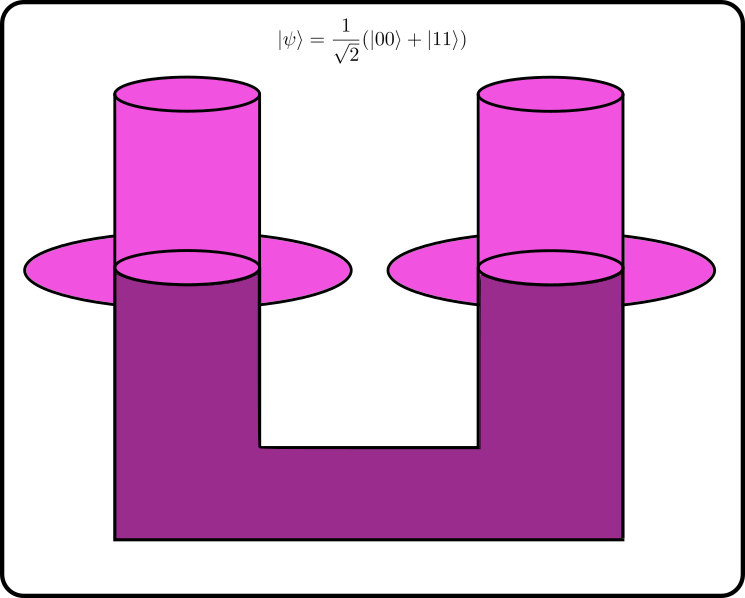

In [22]:
Image(filename="Images/f_ent.png")

In the last implementation we want to have the oportunity to visualize this plot when the circuit is implemeted more quantmu gates, thats means what is the time behaviour of the circuit.  

# Thanks! 